In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
path = './data/pima-indians-diabetes3.csv'

df = pd.read_csv(path)

In [4]:
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# EDA
# 정상과 당뇨 환자 각각 몇명인지 조사

df['diabetes'].value_counts()

# 0 : 정상   1 : 당뇨환자

0    500
1    268
Name: diabetes, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


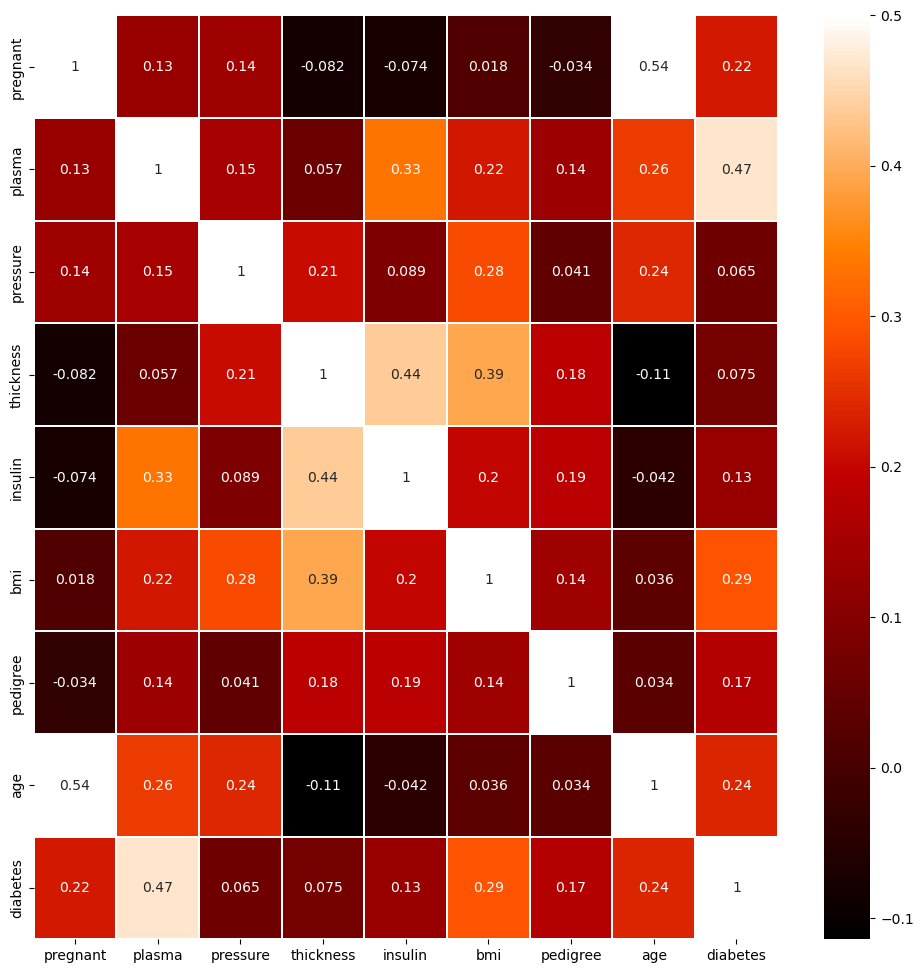

In [10]:
# 데이터 간 상관관계 시각화

color_map = plt.cm.gist_heat
plt.figure(figsize = (12, 12))

# 그래프 속성 결정 >> vmax = 0.5란 >> 0.5에 가까우면 밝은색 표시해줘
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, cmap = color_map, linecolor = 'white', annot = True)
plt.show()

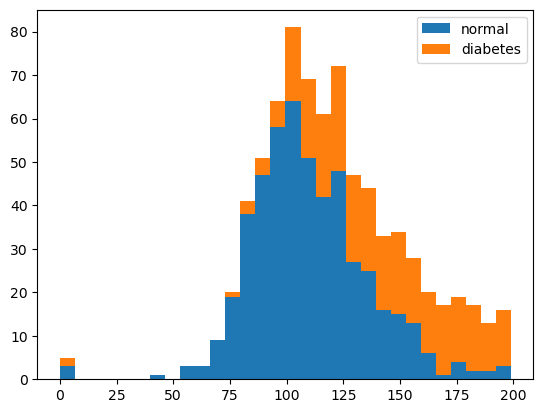

In [14]:
# 중요한 데이터 추출

# plasma 기준, 정상, 당뇨가 어느 정도 비율로 분포하는지 살펴 보기

plt.hist(x = [df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]],
         bins = 30, histtype = 'barstacked', label = ['normal', 'diabetes'])
plt.legend()
plt.show()

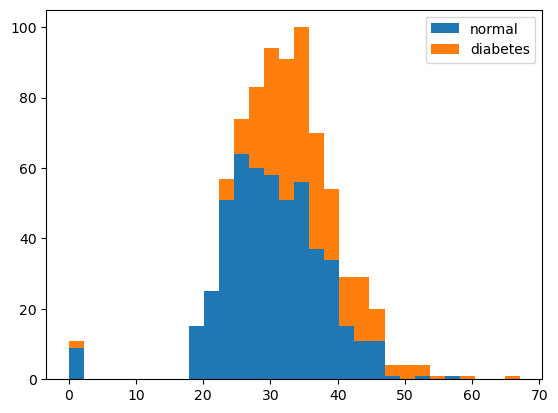

In [15]:
# BMI 기준, 정상과 당뇨가 어느정도 비율로 분포하는지 살펴보기

plt.hist(x = [df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]],
         bins = 30, histtype = 'barstacked', label = ['normal', 'diabetes'])
plt.legend()
plt.show()

In [16]:
# 파마 인디언 당뇨병 예측 실행

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu', name = 'Dense_01'))
model.add(Dense(8, activation='relu', name = 'Dense_02'))
model.add(Dense(1, activation='sigmoid', name = 'Dense_03'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_01 (Dense)            (None, 12)                108       
                                                                 
 Dense_02 (Dense)            (None, 8)                 104       
                                                                 
 Dense_03 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# 모델 실행
history = model.fit(x, y, epochs = 100, batch_size = 5)

Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 2.4958 - accuracy: 0.5898
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 1.0762 - accuracy: 0.5443
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 0.8981 - accuracy: 0.5690
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.8165 - accuracy: 0.6042
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7250 - accuracy: 0.6237
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7307 - accuracy: 0.6146
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.6536
Epoch 8/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.6589
Epoch 9/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.6628
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6322 - accura